<a href="https://colab.research.google.com/github/ycd991030/Hua-Guo-Shan/blob/master/Group29_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The code cell below is used to import the required libraries**

In [ ]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import random
import time

**The function tryGetData is used to call the given API and to convert the returned json file into a panda dataframe**

In [ ]:
def tryGetData(year,month,day,hour,minute,second):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)
    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    return timestamp,df

In [ ]:
def changeToAvailiableTime(year,month,day,hour,minute,second):
    if minute == "0" and hour == "0":
        if int(second)<28:
            if int(day) != 1:
                second = str(random.randint(29,59))
                minute = "59"
                hour = "23"
                day = str(int(day)-1)
            else :
                if int(month) == 2 or int(month) == 4 or int(month) == 6 or int(month) == 8 or int(month) == 9 or int(month) == 11:
                    second = str(random.randint(29,59))
                    minute = "59"
                    hour = "23"
                    day = "31"
                    month = str(int(month)-1)
                elif int(month) == 5 or int(month) == 7 or int(month) == 10 or int(month) == 12:
                    second = str(random.randint(29,59))
                    minute = "59"
                    hour = "23"
                    day = "30"
                    month = str(int(month)-1)
                elif int(month) == 1:
                    second = str(random.randint(29,59))
                    minute = "59"
                    hour = "23"
                    day = "31"
                    month = "12"
                    year = str(int(year)-1)
                elif int(month) == 3:
                    if ((int(year) % 4) == 0):
                        second = str(random.randint(29,59))
                        minute = "59"
                        hour = "23"
                        day = "29"
                        month = str(int(month)-1)
                    else:
                        second = str(random.randint(29,59))
                        minute = "59"
                        hour = "23"
                        day = "28"
                        month = str(int(month)-1)
    return year,month,day,hour,minute,second

In [ ]:
def randomTimeInitial():
    flag = random.randint(0,1)
    if flag:
        year = str(random.randint(2019,2021))
        month = str(random.randint(1,12))
        day = str(random.randint(1,28))
        hour = str(random.randint(0,23))
        minute = str(random.randint(0,59))
        second = str(random.randint(0,59))
    else:
        year = "2022"
        month = str(random.randint(1,9))
        day = str(random.randint(1,28))
        hour = str(random.randint(0,23))
        minute = str(random.randint(0,59))
        second = str(random.randint(0,59))
    year,month,day,hour,minute,second = changeToAvailiableTime(year,month,day,hour,minute,second)
    return year,month,day,hour,minute,second

**Q1.1**

**By making a request to the API and extracting the resulting "lot_type" column and removing duplicates, there are 3 types in total.**

**After  searching for the LTA Datamall API documentation, we find out what does each letter means. There are 3 lot types:**

**C(for cars)**

**H(for Heavy Vehicles)**

**Y(for Motorcycles)**

**In 2021 and before, there were 4 lot types, and another one  was L, but the specific meaning of L cannot be found in the LTA official document now.**

In [ ]:
def getData11(year,month,day,hour,minute,second):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    df1_1 = pd.DataFrame() 
    df1_1['lot_type']=df['lot_type']
    return df1_1

year,month,day,hour,minute,second = randomTimeInitial()
print("the random time is",year,month,day,hour,minute,second)
df1_1 = getData11(year,month,day,hour,minute,second)
print(df1_1)
'''
df1_1.to_csv('\\Users\\jichengzhiyuan\\OneDrive\\Desktop\\df1_1.csv')
writer = pd.ExcelWriter('\\Users\\jichengzhiyuan\\OneDrive\\Desktop\\df1_1.xlsx')
df1_1.to_excel(writer)
writer.save()
'''
df1_2 = df1_1.drop_duplicates(subset=None,keep='first')
df1_2 = df1_2.reset_index(drop=True)
print(df1_2)

the random time is 2020 10 15 11 53 58
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-10-15T11%3A53%3A58
2020-10-15T11:53:27+08:00
     lot_type
0           C
1           C
2           C
3           C
4           C
...       ...
2051        Y
2052        C
2053        C
2054        C
2055        C

[2056 rows x 1 columns]
  lot_type
0        C
1        Y
2        H
3        L


**Q1.2**

**We start by randomly changing the  query time and observing the data.(As shown in the previous code cell)**

**We can notice that the database updates at the 27th second of every minute. Hence,the database updates every minute.**

Some examples:
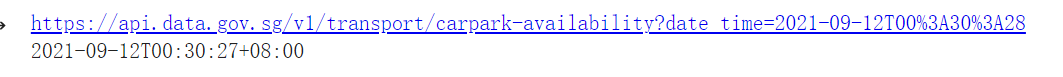

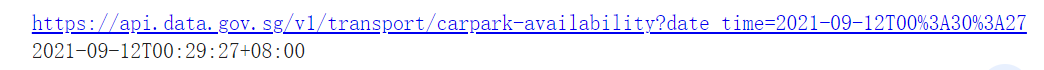




**The function getData21 is used to request API, if encounter network problems and other exceptions, it automatically try to rerequest agian. Then it can write each returned "timestamp" to a dataframe named df2-1. df2-1 is then returned.**

In [ ]:
def getData21(year,month,day,hour,minute,second,df2_1):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    a = [timestamp]
    df2_1 = df2_1.append(a, ignore_index=True)
    return df2_1

We run the query in seconds, the smallest unit of the query, and by running thousands of queries, we record the timestamp and remove the redundant items to prove that our intuition was correct.
It turns out that the actual minimum interval for each truly valid query is **minute**.
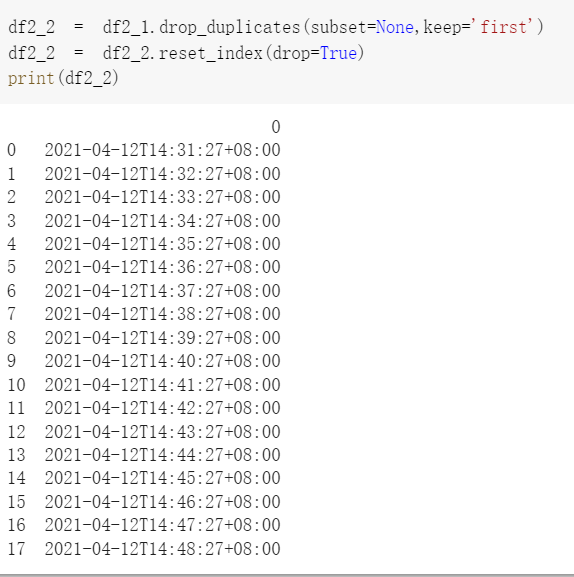

In [ ]:
year = "2021"
month = "4"
day = "12"
hour = "14"
minute = "31"
second = "50"
df2_1 = pd.DataFrame()
var = 0
count = 0
while var == 0:
    #print(second)
    df2_1 = getData21(year,month,day,hour,minute,second,df2_1)
    second = str(int(second)+1)
    if second == "60":
        minute = str((int(minute)+1) % 60)
        second = str(int(second) % 60)
    count+=1
    print("the",count,"-th round")
    #print(df2_1)
    if count == 1000:
        break
#df2_2 = df2_1.drop_duplicates(subset=None,keep='first')
#df2_2 = df2_2.reset_index(drop=True)
print(df2_1)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A50
2021-04-12T14:31:27+08:00
the 1 -th round
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A51
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A51
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-04-12T14%3A31%3A51
https://api.data.gov.sg/v1/transport/c

In [ ]:
df2_2 = df2_1.drop_duplicates(subset=None,keep='first')
df2_2 = df2_2.reset_index(drop=True)
print(df2_2)

                            0
0   2021-04-12T14:31:27+08:00
1   2021-04-12T14:32:27+08:00
2   2021-04-12T14:33:27+08:00
3   2021-04-12T14:34:27+08:00
4   2021-04-12T14:35:27+08:00
5   2021-04-12T14:36:27+08:00
6   2021-04-12T14:37:27+08:00
7   2021-04-12T14:38:27+08:00
8   2021-04-12T14:39:27+08:00
9   2021-04-12T14:40:27+08:00
10  2021-04-12T14:41:27+08:00
11  2021-04-12T14:42:27+08:00
12  2021-04-12T14:43:27+08:00
13  2021-04-12T14:44:27+08:00
14  2021-04-12T14:45:27+08:00
15  2021-04-12T14:46:27+08:00
16  2021-04-12T14:47:27+08:00
17  2021-04-12T14:48:27+08:00


**Q1.3 (i)We cannot say, we select random times to query and find the carpark number varies. (ii) Yes**
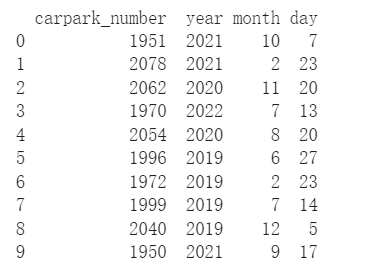

In [ ]:
def getData31(year,month,day,hour,minute,second):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    df1 = df 
    return df1

df3_1_2 = pd.DataFrame(columns=["carpark_number","year","month","day"])
#print(df3_1_2)
for i in range(10):
    year,month,day,hour,minute,second = randomTimeInitial()
    print("the random time is",year,month,day,hour,minute,second)
    df3_1_1 = getData31(year,month,day,hour,minute,second)
    #print(df3_1_1.shape)
    #print(df3_1_1.size)
    #print(int(df3_1_1.size/6))
    a = pd.DataFrame({"carpark_number":[(int(df3_1_1.size/6))],"year":[year],"month":[month],"day":[day]})
    df3_1_2 = pd.concat([df3_1_2,a],ignore_index=True)
print(df3_1_2)



Empty DataFrame
Columns: [carpark_number, year, month, day]
Index: []
the random time is 2021 10 7 23 49 15
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-10-07T23%3A49%3A15
2021-10-07T23:48:26+08:00
the random time is 2021 2 23 11 54 0
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-02-23T11%3A54%3A00
2021-02-23T11:53:27+08:00
the random time is 2020 11 20 4 35 0
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-11-20T04%3A35%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-11-20T04%3A35%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-11-20T04%3A35%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-11-20T04%3A35%3A00
2020-11-20T04:34:27+08:00
the random time is 2022 7 13 15 42 14
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-07-13T15%3A42%3A14
2022-07-13T15:41:27+08:00
the random time is 2020 8 20 4 5

**（iii）When lots_availabile>total_lots,a carpark may have malfunctioning sensors. We query data at random times and select the carparks with lots_availabile>total_lots to print.**

**For such data, we should discard, because it is completely unreasonable.**

发现随机的时候有一些传感器一直都是坏的，但是某一次识别到了2025，让我们根据2025的时间对2025进行研究

In [ ]:
def getData32(year,month,day,hour,minute,second):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    df = df.drop(["carpark_info"], axis=1)
    df['total_lots']=df['total_lots'].astype('int')
    df['lots_available']=df['lots_available'].astype('int')
    df["lots_percentage"] = df["lots_available"]/df["total_lots"]
    df1 = df.dropna()
    return df1
year = "2020"
month = "6"
day = "22"
hour =""


for i in range(10):
    year,month,day,hour,minute,second = randomTimeInitial()
    print("the random time is",year,month,day,hour,minute,second)
    df3_3_1 = getData32(year,month,day,hour,minute,second)
    print(df3_3_1[df3_3_1['lots_available']>df3_3_1['total_lots']])

the random time is 2022 3 28 19 50 25
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-03-28T19%3A50%3A25
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-03-28T19%3A50%3A25
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-03-28T19%3A50%3A25
2022-03-28T19:49:27+08:00
    carpark_number      update_datetime  total_lots lot_type  lots_available  \
549          Y49HV  2016-02-15T21:52:35           3        C              28   
599          MR567  2016-02-15T21:52:35          38        C              94   
648          P40L1  2016-02-15T21:52:35           2        C               6   
649          P40L2  2016-02-15T21:52:35           3        C               6   
926           SK24  2016-02-19T11:19:28         181        Y             200   
927           SK24  2016-02-19T11:19:29         181        H             200   

     lots_percentage  
549         9.333333  
599         2.473684  
648         3.000000  
649    

KeyboardInterrupt: ignored

**If the difference between "update_datetime" and the query time is too large, there may also be a sensor failure.For example, the query time is 2022, but the "update_datetime" is 2021，2015 or 2014, such data should also be discarded**

In [ ]:
def getData33(year,month,day,hour,minute,second):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    return df

year,month,day,hour,minute,second = randomTimeInitial()
print("the random time is",year,month,day,hour,minute,second)
df3_4 = getData33(year,month,day,hour,minute,second)
df3_5 = df3_4.sort_values(by='update_datetime')
print(df3_5)
#print(df3_5.dtypes)
Mystring = "{}-{}-{}T{}:{}:{}".format(str(int(year)-1),month,day,hour,minute,second)
print(df3_5[df3_5['update_datetime']<Mystring])


the random time is 2022 5 18 9 26 19
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-05-18T09%3A26%3A19
2022-05-18T09:25:27+08:00
                                           carpark_info carpark_number  \
1933  [{'total_lots': '71', 'lot_type': 'C', 'lots_a...           TEST   
238   [{'total_lots': '75', 'lot_type': 'C', 'lots_a...            B90   
239   [{'total_lots': '75', 'lot_type': 'C', 'lots_a...           B90M   
237   [{'total_lots': '120', 'lot_type': 'C', 'lots_...           B88M   
974   [{'total_lots': '691', 'lot_type': 'C', 'lots_...           JM7M   
...                                                 ...            ...   
1080  [{'total_lots': '150', 'lot_type': 'C', 'lots_...            A52   
1412  [{'total_lots': '179', 'lot_type': 'C', 'lots_...            A49   
954   [{'total_lots': '188', 'lot_type': 'C', 'lots_...             A2   
1413  [{'total_lots': '636', 'lot_type': 'C', 'lots_...            A76   
1146  [{'total_lots': '397', 'l

In [ ]:
def getData4(year,month,day,hour,minute,second):
    while True:
        try:
            timestamp,df = tryGetData(year,month,day,hour,minute,second)
        except KeyError:
            continue
        break
    return df
year,month,day,hour,minute,second = randomTimeInitial()
print("the random time is",year,month,day,hour,minute,second)
df3_3_2 = getData4(year,month,day,hour,minute,second)


print(df3_3_2.isnull())
df3_3_3 = df3_3_2.isnull()
df3_3_3 = df3_3_3.drop_duplicates(keep='first')
print(df3_3_3)
# There are no rows that are true, so there are no missing values

the random time is 2020 10 14 15 53 17
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2020-10-14T15%3A53%3A17
2020-10-14T15:52:27+08:00
      carpark_info  carpark_number  update_datetime  total_lots  lot_type  \
0            False           False            False       False     False   
1            False           False            False       False     False   
2            False           False            False       False     False   
3            False           False            False       False     False   
4            False           False            False       False     False   
...            ...             ...              ...         ...       ...   
2051         False           False            False       False     False   
2052         False           False            False       False     False   
2053         False           False            False       False     False   
2054         False           False            False       False     False

**Q1.4**

**We design a function "getData" that takes a specified date as an argument to request API . This function can query the data for the specified time and return the average lot available rate(lots_available/total_lots) of all parking lots.**

In [ ]:
# Change these values for different dates

year = "2022"
month = "4"
day = "12"
hour = "14"
minute = "31"
second = str(random.randint(27,59))
#function: Calculate the average avability of all vehicles from a given time

#Input parameters：the given time,year,month,day,hour,minute,second

#output parameters: the average avability of all vehicles from a given time

# year,month,day,hour,minute,second=randomTimeInitial()
# this line can deal with 00:00:00 and 24:00:00
def getData(year,month,day,hour,minute,second):
    count=0
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)

    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    #df = df.drop(["carpark_info"], axis=1)
    #df.info()
    #df[df.duplicated(['carpark_number'])]
    df['total_lots']=df['total_lots'].astype('int')
    df['lots_available']=df['lots_available'].astype('int')
    df["lots_percentage"] = df["lots_available"]/df["total_lots"]
    df1 = df.dropna()
    for itm in df1.iterrows():
        #if(itm[1]['lots_percentage'] is None): 
            #continue
        count+=itm[1]['lots_percentage']
    print(count)
    #df.to_csv('/Users/yangchengdong/Desktop/cars10.csv', index=False)
    count=count/len(df1)
    #print(len(df1))
    #print(count)
    time.sleep(1)
    print(df1)
    return count
percentage=getData(year,month,day,hour,minute,second)
print(percentage)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T14%3A31%3A40
2022-04-12T14:31:27+08:00
1187.5412005926555
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lo

**Next, increments the query time by 1 hour each time for a period of one month.**

In [ ]:
dr = pd.DataFrame()
dr['date'] = pd.date_range(start='20220412123143', end='20220512123150', freq='H')
dr['year'] = dr['date'].dt.year
dr['month'] = dr['date'].dt.month
dr['day']=dr['date'].dt.day
dr['hour'] = dr['date'].dt.hour
dr['minute'] = dr['date'].dt.minute
dr['second'] = dr['date'].dt.second
print(dr)
dr.info()

result=pd.DataFrame()
result['date']=dr['date']
result['year'] = result['date'].dt.year
result['month'] = result['date'].dt.month
result['day']=result['date'].dt.day
result['hour'] = result['date'].dt.hour
result['minute'] = result['date'].dt.minute
result['second'] = result['date'].dt.second
#result['lots_percentage']
result = result.reindex(columns = ['date','year','month','day','hour','minute','second','lots_percentage'], fill_value=0)
print(result)
Count=0
for item in result.iterrows():
    print('获取行索引:', item[0])
    Year=str(item[1]['year'])
    Month=str(item[1]['month'])
    Day=str(item[1]['day'])
    Hour=str(item[1]['hour'])
    Minute=str(item[1]['minute'])
    Second=str(item[1]['second'])
    flag=0
    while True:
        try:
            result.loc[Count,'lots_percentage'] = getData(Year,Month,Day,Hour,Minute,Second)
        except KeyError:
            continue
        break
    Count+=1
result.to_csv('/Users/yangchengdong/Desktop/cars2.csv', index=False)


                   date  year  month  day  hour  minute  second
0   2022-04-12 12:31:43  2022      4   12    12      31      43
1   2022-04-12 13:31:43  2022      4   12    13      31      43
2   2022-04-12 14:31:43  2022      4   12    14      31      43
3   2022-04-12 15:31:43  2022      4   12    15      31      43
4   2022-04-12 16:31:43  2022      4   12    16      31      43
..                  ...   ...    ...  ...   ...     ...     ...
716 2022-05-12 08:31:43  2022      5   12     8      31      43
717 2022-05-12 09:31:43  2022      5   12     9      31      43
718 2022-05-12 10:31:43  2022      5   12    10      31      43
719 2022-05-12 11:31:43  2022      5   12    11      31      43
720 2022-05-12 12:31:43  2022      5   12    12      31      43

[721 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    721

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T15%3A31%3A43
2022-04-12T15:31:27+08:00
1200.3137141283278
1966
0.6105359685291596
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...            JB1   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '24

2022-04-12T19:31:27+08:00
987.3465255323279
1965
0.5024664252072916
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...           GE1G   

          update_datetime  total_lots lot_t

2022-04-12T23:31:27+08:00
859.4944612613435
1964
0.4376244711106637
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T03%3A31%3A43
2022-04-13T03:31:27+08:00
818.5302808173225
1965
0.41655485028871375
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                        

2022-04-13T07:31:27+08:00
1001.7626353879763
1963
0.5103222798716129
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-13T11:31:27+08:00
1174.3704302570318
1965
0.5976439848636294
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T15%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T15%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T15%3A31%3A43
2022-04-13T15:31:27+08:00
1192.9982189984935
1964
0.6074329017303939
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...        

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-13T19%3A31%3A43
2022-04-13T19:31:27+08:00
1000.4524661486537
1962
0.5099146106771936
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '24

2022-04-13T23:31:27+08:00
865.2288109457826
1963
0.44076862503605835
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T03%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T03%3A31%3A43
2022-04-14T03:31:27+08:00
825.1518206608791
1965
0.4199245906671141
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...         

2022-04-14T07:31:27+08:00
997.651738880404
1962
0.5084871248116228
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T11%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T11%3A31%3A43
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-14T11%3A31%3A43
2022-04-14T11:31:27+08:00
1169.5007166197074
1962
0.5960757984809926
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...        

2022-04-14T15:31:27+08:00
1189.162892276299
1964
0.6054800877170565
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1964  [{'total_lots': '10', 'lot_type': 'Y', 'lots_a...            HE1   

          update_datetime  total_lots lot_t

2022-04-14T19:31:27+08:00
1046.5950201226624
1962
0.5334327319687372
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-14T23:31:27+08:00
913.9329920301043
1963
0.4655797208507918
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-15T03:31:27+08:00
844.8927543060283
1962
0.4306283151406872
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-15T07:31:28+08:00
841.1375196971795
1966
0.42784207512572714
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-15T11:31:27+08:00
937.1898291621778
1966
0.4766987940804567
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            HE1   

          update_datetime  total_lots lot_t

2022-04-15T15:31:27+08:00
994.5789701333559
1965
0.5061470585920387
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '76', 'lot_type': 'Y', 'lots_a...            MP2   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-15T19:31:27+08:00
971.2786467488733
1965
0.4942893876584597
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-15T23:31:27+08:00
906.080744706673
1965
0.46110979374385397
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-16T03:31:27+08:00
851.6093100729827
1963
0.4338305196500166
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '17', 'lot_type': 'Y', 'lots_a...           MP17   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-16T07:31:27+08:00
862.652514377349
1965
0.4390089131691344
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...            JB1   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-04-16T11:31:27+08:00
1018.5335646107824
1964
0.5186016113089523
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-16T15:31:27+08:00
1025.1338642527644
1963
0.5222281529560695
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-16T19:31:27+08:00
983.9089932567038
1964
0.50097199249323
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_typ

2022-04-16T23:31:27+08:00
902.6301003654849
1966
0.45912009174236257
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '5', 'lot_type': 'Y', 'lots_av...            BM6   

          update_datetime  total_lots lot_

2022-04-17T03:31:27+08:00
842.8141312603265
1965
0.42891304389838497
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-17T07:31:27+08:00
839.1793768249346
1967
0.4266290680350455
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...             H3   

          update_datetime  total_lots lot_t

2022-04-17T11:31:27+08:00
912.0825010778452
1963
0.46463703569936077
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-17T15:31:27+08:00
949.2228578772161
1964
0.4833110274323911
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-17T19:31:27+08:00
913.460935028134
1968
0.46415697918096244
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...            JB1   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            TE1   

          update_datetime  total_lots lot_t

2022-04-17T23:31:27+08:00
856.0447368179433
1965
0.43564617649768106
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-18T03:31:27+08:00
820.6261592598822
1964
0.4178340933095123
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-18T07:31:27+08:00
1020.785056718784
1963
0.5200127645026917
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-18T11:31:26+08:00
1179.1035318482382
1963
0.6006640508651239
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-18T15:31:27+08:00
1194.506780549717
1965
0.6078914913739017
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-18T19:31:27+08:00
1002.4976464332257
1969
0.5091405009818312
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '17', 'lot_type': 'Y', 'lots_a...           MP17   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-18T23:31:27+08:00
856.6342458752064
1962
0.43661276548175654
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-19T03:31:27+08:00
813.3330214698791
1966
0.4136994005441908
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '154', 'lot_type': 'Y', 'lots_...           MP2M   

          update_datetime  total_lots lot_t

2022-04-19T07:31:27+08:00
984.4266466495263
1964
0.5012355634671722
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-19T11:31:27+08:00
1173.548987627858
1965
0.5972259479022178
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-19T15:31:27+08:00
1201.303638992377
1966
0.6110394908404766
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-19T19:31:27+08:00
992.6809115179007
1967
0.5046674689974076
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '76', 'lot_type': 'Y', 'lots_a...            MP2   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-19T23:31:27+08:00
853.1048287947121
1965
0.43415004009909014
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            MP1   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-20T03:31:27+08:00
817.370928319518
1964
0.41617664374720875
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-20T07:31:26+08:00
960.3571150116679
1965
0.48873135624003455
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-20T11:31:27+08:00
1175.2222472744386
1965
0.5980774795289764
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-20T15:31:27+08:00
1196.8226841242874
1966
0.6087602665942459
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            HE1   

          update_datetime  total_lots lot_

2022-04-20T19:31:27+08:00
993.5842696529077
1964
0.5058983043039245
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-20T23:31:26+08:00
860.5500359485112
1965
0.43793894959211765
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '154', 'lot_type': 'Y', 'lots_...           MP2M   

          update_datetime  total_lots lot_

2022-04-21T03:31:27+08:00
815.5710459824019
1964
0.41526020671201724
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-21T07:31:27+08:00
1006.6294910520947
1966
0.5120190697111368
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-21T11%3A31%3A43
2022-04-21T11:31:27+08:00
1174.0662863529606
1965
0.5974892042508705
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '20

2022-04-21T15:31:27+08:00
1194.245002036833
1964
0.6080677199780209
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-21T19:31:27+08:00
975.8343053210137
1967
0.49610284968023066
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP2M   

          update_datetime  total_lots lot_

2022-04-21T23:31:27+08:00
875.7676124117786
1962
0.4463647361935671
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-22T03:31:27+08:00
823.214879799863
1965
0.41893887012715675
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '19', 'lot_type': 'Y', 'lots_a...            JB3   

          update_datetime  total_lots lot_t

2022-04-22T07:31:27+08:00
967.2720619185194
1964
0.4925010498566799
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-22T11:31:27+08:00
1156.2753680451842
1963
0.5890348283470118
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            MP2   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-22T15:31:27+08:00
1173.0678057832383
1967
0.5963740751312854
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-22T19:31:27+08:00
1017.4016101676218
1964
0.5180252597594815
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-22T23:31:28+08:00
904.2649014888069
1964
0.4604200109413477
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-23T03:31:26+08:00
835.3330808630191
1965
0.42510589356896644
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-23T07:31:27+08:00
851.278828507079
1966
0.43300042141763934
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP17   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-23T11:31:27+08:00
1014.5918004911255
1963
0.5168577689715361
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-23T15:31:27+08:00
1017.9813401448198
1962
0.518848797219582
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1958  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1959  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1960  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1961  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1962  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-23T19:31:27+08:00
975.0883577987889
1966
0.4959757669373291
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            HE1   

          update_datetime  total_lots lot_t

2022-04-23T23:31:26+08:00
882.8526184831077
1965
0.4492888643679937
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            SPS   

          update_datetime  total_lots lot_t

2022-04-24T03:31:27+08:00
826.3237096632115
1969
0.4196666885034086
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1966  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-24T07:31:27+08:00
816.8847216254006
1964
0.41592908433065207
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-24T11:31:27+08:00
905.4988241630786
1964
0.461048281142097
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-04-24T15:31:27+08:00
937.6466754574566
1963
0.4776600486283528
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-24T19:31:26+08:00
901.9916629038931
1964
0.4592625574867073
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-24T23:31:26+08:00
857.4028486844016
1967
0.4358936698954762
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-25T03:31:27+08:00
814.6521035795383
1968
0.41394923962374913
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1967  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1968  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-25T07:31:28+08:00
1002.7339195852469
1964
0.5105569855322031
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1964  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            HCM   

          update_datetime  total_lots lot_

2022-04-25T11:31:27+08:00
1162.8860590899008
1966
0.5914985041149038
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-25T15:31:27+08:00
1180.921791963626
1965
0.6009780111774178
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-25T19:31:27+08:00
1006.7075330975932
1965
0.5123193552659507
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-25T23:31:27+08:00
860.2689662947065
1969
0.4369065344310343
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            MP1   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-26T03:31:27+08:00
822.153018475923
1970
0.41733655760199134
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1966  [{'total_lots': '76', 'lot_type': 'Y', 'lots_a...            MP2   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1970  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP2M   

          update_datetime  total_lots lot_t

2022-04-26T07:31:27+08:00
976.330704536122
1969
0.49585104344140274
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1966  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-26T11:31:27+08:00
1166.825482428245
1966
0.593502279973675
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-04-26T15:31:27+08:00
1188.2317173989359
1967
0.6040832320279288
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-26T19:31:27+08:00
978.5519368192367
1963
0.498498184828954
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-04-26T23:31:27+08:00
859.7013942319405
1968
0.43684013934549826
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            TE1   

          update_datetime  total_lots lot_

2022-04-27T03:31:27+08:00
821.1686074141294
1966
0.41768494782000476
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...           GE1G   

          update_datetime  total_lots lot_

2022-04-27T07:31:27+08:00
966.757273889275
1967
0.4914881921145272
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '21', 'lot_type': 'Y', 'lots_a...            JB2   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-04-27T11:31:27+08:00
1172.822006238001
1971
0.5950390696286154
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1970  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            JB3   
1971  [{'total_lots': '359', 'lot_type': 'Y', 'lots_...           GE1A   

          update_datetime  total_lots lot_t

2022-04-27T15:31:27+08:00
1189.4693515796625
1968
0.6044051583229992
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1967  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1968  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-27T19:31:27+08:00
982.5376320168687
1968
0.4992569268378398
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            JB3   

          update_datetime  total_lots lot_t

2022-04-27T23:31:27+08:00
861.4535312606378
1966
0.4381757534387781
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-28T03:31:27+08:00
821.9926097160225
1966
0.41810407411801753
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-28T07:31:27+08:00
954.2008838472509
1964
0.48584566387334566
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-28T11:31:27+08:00
1167.2209448234332
1965
0.5940055698846989
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-28T15:31:27+08:00
1189.9414775491696
1965
0.605568181958865
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-28T19:31:27+08:00
987.1416076036134
1968
0.5015963453270393
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            HCM   

          update_datetime  total_lots lot_t

2022-04-28T23:31:27+08:00
874.5660872342611
1964
0.44529841508872764
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-29T03:31:27+08:00
821.4191031349814
1968
0.417387755658019
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           TB10   

          update_datetime  total_lots lot_ty

2022-04-29T07:31:27+08:00
967.7581734502156
1969
0.49149729479442134
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1966  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-29T11:31:27+08:00
1165.8327705555862
1968
0.5923947004855621
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1967  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1968  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-29T15:31:27+08:00
1189.463692632143
1969
0.6040953238355221
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            MP1   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-29T19:31:27+08:00
1024.0894079416792
1966
0.5209000040395113
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-29T23:31:26+08:00
901.7209805890878
1966
0.4586576706963824
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-30T03:31:27+08:00
832.0955843873821
1965
0.4234583126653344
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...            JB1   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-30T07:31:26+08:00
847.2741048485859
1969
0.4303068079474789
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1966  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-04-30T11:31:27+08:00
1011.5750040058325
1965
0.5147964396976247
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            SPS   

          update_datetime  total_lots lot_

2022-04-30T15:31:27+08:00
1033.0708752749326
1966
0.5254684004450318
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-04-30T19:31:27+08:00
996.119922108177
1967
0.5064158221190529
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            SPS   

          update_datetime  total_lots lot_ty

2022-04-30T23:31:27+08:00
904.3854430195473
1968
0.4595454486887944
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '76', 'lot_type': 'Y', 'lots_a...            MP2   
1966  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1967  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1968  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-01T03:31:27+08:00
842.1208322306047
1963
0.42899685798808185
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-01T07:31:27+08:00
833.2613650697238
1965
0.4240515852772131
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-01T11:31:27+08:00
934.4344634792831
1972
0.4738511478089671
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1968  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1969  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1970  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1971  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            SPS   
1972  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            TE1   

          update_datetime  total_lots lot_t

2022-05-01T15:31:27+08:00
959.236771726349
1967
0.48766485598695936
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'Y', 'lots_a...            HE1   
1967  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP2M   

          update_datetime  total_lots lot_t

2022-05-01T19:31:27+08:00
966.1095087469283
1967
0.4911588758245696
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-01T23:31:27+08:00
909.4024208421731
1965
0.4628002141690448
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-02T03:31:27+08:00
854.7817962411317
1967
0.43456115721460686
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP2M   

          update_datetime  total_lots lot_

2022-05-02T07:31:27+08:00
859.255195105948
1966
0.43705757635094
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_type

2022-05-02T11:31:27+08:00
946.0208601291178
1967
0.4809460397199378
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            BM6   

          update_datetime  total_lots lot_t

2022-05-02T15:31:27+08:00
986.1682596991641
1966
0.5016115257879776
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '60', 'lot_type': 'Y', 'lots_a...            TE1   

          update_datetime  total_lots lot_t

2022-05-02T19:31:27+08:00
964.7362589848711
1965
0.49095992823657564
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-02T23:31:27+08:00
915.6550446365794
1967
0.46550841110146385
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1964  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-03T03:31:27+08:00
853.1480141979067
1963
0.43461437299944305
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-03T07:31:27+08:00
853.9452455090473
1965
0.43457773308348463
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-03T11:31:27+08:00
907.9001804996625
1967
0.46156592806286856
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            JB1   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-03T15:31:27+08:00
944.2280664214958
1966
0.480278772340537
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-03T19:31:27+08:00
926.0362795383988
1968
0.470546890009349
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1964  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1965  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1966  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1967  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1968  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-03T23:31:27+08:00
866.16024267699
1965
0.44079401662951145
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-04T03:31:27+08:00
822.846981233065
1965
0.4187516443934173
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...            JB1   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-04T07:31:27+08:00
959.7869783212545
1969
0.4874489478523385
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1965  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1966  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1967  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1968  [{'total_lots': '5', 'lot_type': 'Y', 'lots_av...            BM6   
1969  [{'total_lots': '53', 'lot_type': 'Y', 'lots_a...             H3   

          update_datetime  total_lots lot_t

2022-05-04T11:31:27+08:00
1160.8077821785191
1964
0.5910426589503661
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP17   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-04T15:31:27+08:00
1182.9133401089778
1966
0.6016853205030406
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '208', 'lot_type': 'Y', 'lots_...            HCM   

          update_datetime  total_lots lot_

2022-05-04T19:31:27+08:00
977.8886336826542
1965
0.4976532486934627
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-04T23:31:27+08:00
862.3955862566396
1966
0.4386549268853711
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '359', 'lot_type': 'Y', 'lots_...           GE1A   
1966  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            HCM   

          update_datetime  total_lots lot_t

2022-05-05T03:31:27+08:00
818.3454407175954
1964
0.4166728313226046
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-05T07:31:27+08:00
957.6502746037312
1965
0.4873538293148759
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-05T11:31:27+08:00
1173.5470939438235
1964
0.5975290702361626
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-05T15:31:27+08:00
1191.4463704118386
1964
0.6066427547921786
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-05T19:31:27+08:00
1033.63465180358
1966
0.5257551636844252
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-05T23:31:27+08:00
867.4218158402131
1965
0.44143603859552827
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-05-06T03%3A31%3A43
2022-05-06T03:31:27+08:00
819.1183652931777
1966
0.41664209831799476
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '24

2022-05-06T07:31:27+08:00
980.0623938358975
1965
0.49875948795719977
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-06T11:31:27+08:00
1173.856561343275
1965
0.5973824739660433
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-06T15:31:27+08:00
1188.3555556759902
1965
0.6047610970361273
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-06T19:31:27+08:00
1050.3457076910079
1964
0.5347992401685376
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-06T23:31:27+08:00
900.5779315707083
1964
0.4585427350156356
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-07T03:31:27+08:00
830.9678855561501
1965
0.4228844201303563
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-07T07:31:27+08:00
853.8188601387451
1964
0.43473465383846494
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-07T11:31:26+08:00
1012.4734686620767
1964
0.5155160227403649
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-07T15:31:27+08:00
1004.2046851220505
1966
0.5107856994517042
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           GE1A   

          update_datetime  total_lots lot_

2022-05-07T19:31:27+08:00
967.1552032015595
1963
0.4926924112081302
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-07T23:31:27+08:00
891.932267299872
1964
0.4541406656312994
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-08T03:31:27+08:00
826.7291362701409
1970
0.4196594600356045
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1966  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1967  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1968  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1969  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1970  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...           TB10   

          update_datetime  total_lots lot_t

2022-05-08T07:31:27+08:00
817.0873989094705
1967
0.41539776253658894
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1967  [{'total_lots': '53', 'lot_type': 'Y', 'lots_a...             H3   

          update_datetime  total_lots lot_

2022-05-08T11:31:27+08:00
902.9336704974646
1965
0.45950822926079626
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-08T15:31:27+08:00
938.5692875951099
1964
0.47788660264516797
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-08T19:31:27+08:00
920.087638091732
1966
0.46799981591644557
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-08T23:31:27+08:00
853.1426684386946
1965
0.4341692969153662
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-09T03:31:27+08:00
819.731959785904
1964
0.4173787982616619
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1964  [{'total_lots': '10', 'lot_type': 'Y', 'lots_a...            HE1   

          update_datetime  total_lots lot_ty

2022-05-09T07:31:27+08:00
954.297830786374
1966
0.48540072776519533
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1963  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1964  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1965  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1966  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-09T11:31:27+08:00
1184.5366385213144
1963
0.6034318077031657
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-09T15:31:27+08:00
1208.886787427203
1966
0.6148966365346913
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1966  [{'total_lots': '10', 'lot_type': 'H', 'lots_a...            BM6   

          update_datetime  total_lots lot_t

2022-05-09T19:31:27+08:00
1008.574554667021
1963
0.5137924374258894
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-09T23:31:27+08:00
854.5083566732319
1965
0.4348643036504997
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-10T03:31:27+08:00
821.2497533528515
1965
0.41793880577753256
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1965  [{'total_lots': '80', 'lot_type': 'Y', 'lots_a...           TB10   

          update_datetime  total_lots lot_

2022-05-10T07:31:27+08:00
1003.694871758912
1964
0.5110462687163503
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-10T11:31:27+08:00
1191.3218656147124
1965
0.6062706695240266
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-10T15:31:26+08:00
1203.0802995913386
1964
0.6125663439874433
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-10T19:31:27+08:00
983.9708851186235
1963
0.5012587290466752
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-10T23:31:27+08:00
852.413580647119
1964
0.4340191347490423
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...           MP17   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_ty

2022-05-11T03:31:27+08:00
814.8769432214401
1965
0.41469564540531306
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-11T07:31:27+08:00
965.527954966085
1965
0.49136282695475064
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_t

2022-05-11T11:31:27+08:00
1189.0642725993475
1964
0.6054298740322543
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   
1964  [{'total_lots': '50', 'lot_type': 'H', 'lots_a...            TE1   

          update_datetime  total_lots lot_

2022-05-11T15:31:27+08:00
1199.4208282216325
1963
0.6110141763737302
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1959  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1960  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1961  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1962  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1963  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-11T19:31:27+08:00
1003.4082621619968
1964
0.5109003371496929
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-11T23:31:27+08:00
858.2840020430205
1964
0.43700814767974566
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-12T03:31:27+08:00
820.8825575494217
1965
0.41775193768418406
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-12T07:31:27+08:00
1015.6983790439647
1965
0.5168948493862415
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1961  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1962  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1963  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1964  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1965  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

2022-05-12T11:31:26+08:00
1185.3442037147724
1964
0.6035357452722874
                                           carpark_info carpark_number  \
0     [{'total_lots': '105', 'lot_type': 'C', 'lots_...           HE12   
1     [{'total_lots': '583', 'lot_type': 'C', 'lots_...            HLM   
2     [{'total_lots': '329', 'lot_type': 'C', 'lots_...            RHM   
3     [{'total_lots': '97', 'lot_type': 'C', 'lots_a...           BM29   
4     [{'total_lots': '96', 'lot_type': 'C', 'lots_a...            Q81   
...                                                 ...            ...   
1960  [{'total_lots': '679', 'lot_type': 'C', 'lots_...           B65M   
1961  [{'total_lots': '5', 'lot_type': 'C', 'lots_av...           B65L   
1962  [{'total_lots': '306', 'lot_type': 'C', 'lots_...            BE3   
1963  [{'total_lots': '195', 'lot_type': 'C', 'lots_...           BE3R   
1964  [{'total_lots': '249', 'lot_type': 'C', 'lots_...            B8B   

          update_datetime  total_lots lot_

**Then start plotting the hourly lot availabile rate of for a month.**

**We use line chart to reflect the relationship between the occupancy ratio of parking space and time. The horizontal axis is time, and the interval is one hour. The vertical axis is the availabile rate, availabile rate=lots_available/total_lots.** 

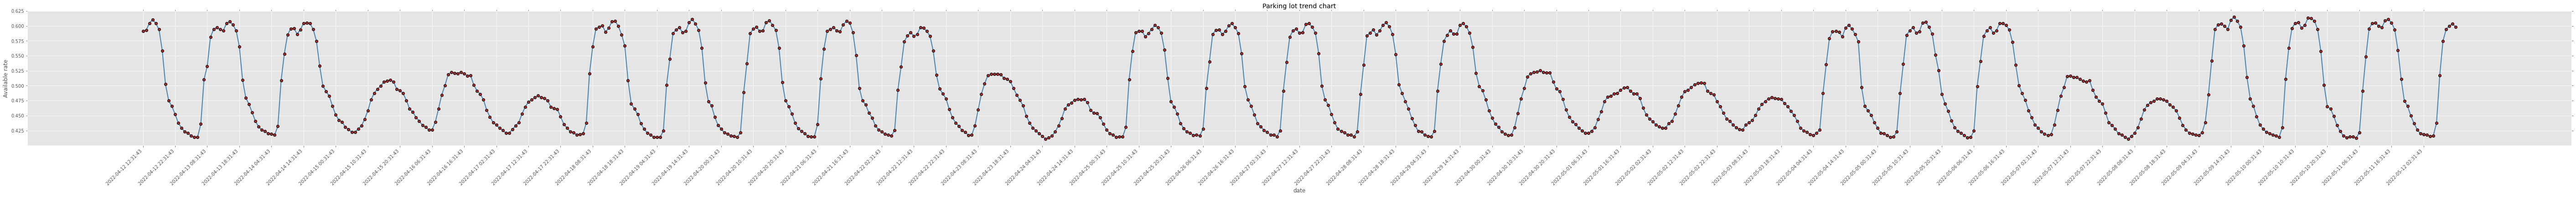

In [ ]:
# draw a line chart
import pandas as pd
import matplotlib.pyplot as plt
csv_file = "/Users/yangchengdong/Desktop/cars2.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
csv_df = pd.DataFrame(csv_data)
plt. style.use("ggplot")
fig = plt.figure(figsize = (100,6))
# 绘图
plt.plot(csv_df.date, #xdata
         csv_df.lots_percentage, # ydata
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown')

plt.title('Parking lot trend chart')
plt.xlabel('date')
plt.ylabel('Available rate')

plt.xticks(range(0,720,10))
plt.tick_params(top = 'off', right = 'off')

fig.autofmt_xdate(rotation = 45)

plt.show()

**The line chart is shown in the figure, starting from 2022-4-12 12:31:43 to 2022-5-12 12:31:43.**

**As can be seen from the figure, the lot available rate of increases significantly during the morning and evening rush hours. The lowest rate of was found at 5 a.m. every day, accounting for around 40%. Then there is a first peak at 10am, then there ia a slight decline, until a second peak at 3pm or 4pm, and then a steady decline until 5am the next day.** 

**During Monday to Friday, the peak can reach 61%, while on the weekend generally the peak reaches the around 50%.**



**Notice: We find that there are no carpark readings at certain time, which is 00:00:00. If the hourly readings include 00:00:00, our idea is that, for the database updating frequency is 1 minute, We can read the previous day's data 23:59:30  and today's data at 00:00:30 , and take the average of the two as the data at 00:00:00.**

**Q1.5**
**We consider the correlation of carparks as the correlation of the change rate of lot available rate over a certain period of time.**

**The function "getTop5" takes one carpark name, a start time and an end time as input. Five carparks with closest change rate at that period of time to that of the input carpark will be returned.**

**When the time period is 2022-4-12,13:31:00 to 2022-4-12,14:30:00, carparks TJ31,SK1,AM46,U13,W78 show highest correlation to carpark A21.**

In [ ]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import random
import time
#function: return dataframe from a given time

#Input parameters：the given time,year,month,day,hour,minute,second

#output parameters: return dataframe from a given time
def getData2(year,month,day,hour,minute,second):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)
    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    df = df.drop(["carpark_info"], axis=1)
    df['total_lots']=df['total_lots'].astype('int')
    df['lots_available']=df['lots_available'].astype('int')
    df["lots_percentage"] = df["lots_available"]/df["total_lots"]
    df1 = df.dropna()
    return df1

#function: Give the carpark number.Returns the trend of two adjacent times for the nearest 5 parking lots

#Input parameters： Carpark number.The first given time,year,month,day,hour,minute,second.The second given time,year,month,day,hour,minute,second.

#output parameters: return dataframe from a given time
def getTop5(name,yearFirst,monthFirst,dayFirst,hourFirst,minuteFirst,secondFirst,yearSecond,monthSecond,daySecond,hourSecond,minuteSecond,secondSecond):
    firstTry=pd.DataFrame()
    firstTry=getData2(yearFirst,monthFirst,dayFirst,hourFirst,minuteFirst,secondFirst)
    secondTry=pd.DataFrame()
    secondTry=getData2(yearSecond,monthSecond,daySecond,hourSecond,minuteSecond,secondSecond)
    #print(firstTry.describe())
    #print(secondTry.describe())
    secondTry.rename(columns={'lots_percentage':'lots_percentage2'},inplace=True)
    result=firstTry.merge(secondTry,how='inner',on='carpark_number')
    result["increase"] = (result["lots_available_y"]-result["lots_available_x"])/result["total_lots_x"]
    #中间值sp
    sp=result[result['carpark_number'] == name]
    #input=sp['increase']
    #print(input.info())
    #print(input.describe())
    sp.reset_index(inplace=True,drop=True)
    temp=sp.loc[0,'increase']
    print(temp)
    #print(sp)
    #print(sp.index)
    #print(sp.info())
    print("the result of search :")
    #print(sp)
    print("the top5 similiar to %s is :"%(name))
    #print(input.iat[0,0])
    another=result.iloc[(result['increase']-(temp)).abs().argsort()[:10]]
    print(another.head(6))
    #sorted=result.carpark_number[(result['increase']-sp['increase']).abs().argsort()[::-1]]
getTop5("A21","2022","4","12","13","31","0","2022","4","12","14","31","0")

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T13%3A31%3A00
2022-04-12T13:30:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T14%3A31%3A00
2022-04-12T14:30:27+08:00
-0.004739336492890996
the result of search :
the top5 similiar to A21 is :
     carpark_number    update_datetime_x  total_lots_x lot_type_x  \
1681            A21  2022-04-12T13:16:13           633          C   
247            TJ31  2022-04-12T13:13:48           833          C   
1743            SK1  2022-04-12T13:13:43           655          C   
35             AM46  2022-04-12T13:16:25           408          C   
496             U13  2022-04-12T13:13:43           661          C   
1614            W78  2022-04-12T13:13:34           442          C   

      lots_available_x  lots_percentage    update_datetime_y  total_lots_y  \
1681               452         0.714060  2022-04-12T14:16:14           633   
247                624         0.749100  2022-04-

**Q1.6**

 In the group project of Question3, we plan to propose an intelligent parking lot prediction system that will help to plan the future construction of parking lots in Singapore. In the Data.gov.sg, we found the dataset URA Parking Lot-Data.gov.sg about the location of parking lots in Singapore, and the dataset HDB Carpark Information-Data.gov.sg about the parking lots of HDB area in Singapore.

  These two datasets contain the location coordinates of all the parking lots in Singapore in terms of latitude and longitude, and we can also know which of them are the parking lots in the HDB area. Since HDB is an area where 80% of Singaporeans live, parking in residential and non-residential areas can be significantly different due to working hours. Therefore, we will divide the parking lots into HDB and non-HDB class. Parking lots in a similar geographic location and belonging to the same category should have similar availability trends. Based on this classification, we predict the aggregated availability of parking lots belonging to the same cluster.

Specifically speaking, first, we will build a geographic model of all parking lots in Singapore on the axes, then classify the parking lots into different blocks by the location of existing parking lots. Last, we will label each block on whether it belongs to residential areas(HDB) or not. The parking lots contained in one block are then aggregated to make predictions about the parking availability trends. Our model is shown in the following figure.
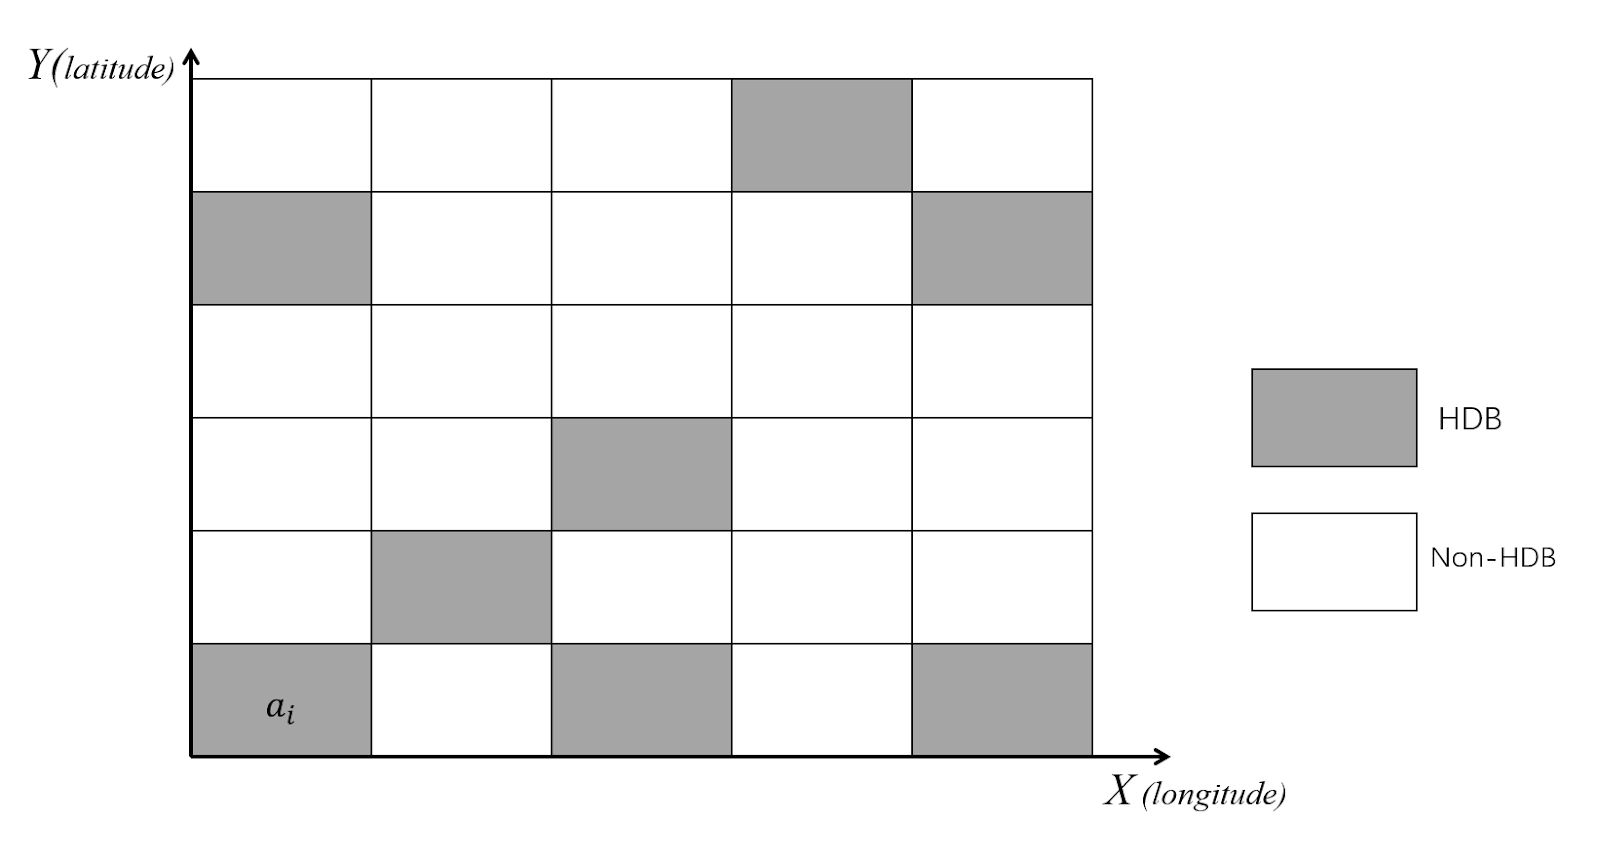

As shown above, the horizontal and vertical coordinates are longitude and latitude respectively, and the coordinates of the parking lots determine whether they will be distributed in different grids, then label them whether this area is a parking lot of HDB. The size of the grid division will be determined by the distribution of parking lots and the distribution of HDB's parking lots. 

After dividing the blocks, we aggregate the parking lots in the same block (parking lots that are located close and belong to the same label) into one group of data, and perform availability prediction for each of these aggregated groups. Eventually, we will analyze the prediction of the overall parking availability of each group.

We plan to predict the trend of availability within a day and within a week. This trend may vary significantly with the working hours and week days. For example, parking lots belonging to HDB zones may have high availability during the working hour, but their availability is lower during the night. In addition, since different blocks correspond to different geographical areas of Singapore, predicting the availability of the blocks can help to plan the construction of future parking lots, for example, we can build more parking lots in areas with low availability, and for those areas with high vacancy rate, we can further investigate and analyze the reasons for them, and make appropriate improvements to address the specific problems. 

With this model, we can improve the overall efficiency of the parking lots in Singapore, contributing to the accessibility of the country’s traffic. 
